### By - Shubham Bhausaheb Aher

## The Sparks Foundation - Data Science and Business Analytics

### Task:5 Exploratory Data Analysis - Terrorism

### Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
● As a security/defense analyst, try to find out the hot zone of terrorism.
● What all security issues and insights you can derive by EDA?

#### Step:1 Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
df = pd.read_csv("C:/Users/hp/Desktop/Data Science/DataSets/global terrorism.csv",encoding="ISO-8859-1")
print("Dataset imported successfully!")

Dataset imported successfully!


In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### Step:2 Now, let's apply the preprocessing techniques to clean the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
# renaming columns 

df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True)
df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#deleting unnecessary columns

df = df[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude',
                 'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
#checking the null values

df.isnull().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
State             421
Region              0
City              434
Latitude         4556
Longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [ ]:
#droping the null values

df.dropna(axis=1 ,how="all")
df.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Extended     181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   State        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   City         181257 non-null  object 
 8   Latitude     177135 non-null  float64
 9   Longitude    177134 non-null  float64
 10  AttackType   181691 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Target       181055 non-null  object 
 14  Summary      115562 non-null  object 
 15  Group        181691 non-null  object 
 16  Target_type  181691 non-null  object 
 17  Weapon_type  181691 non-null  object 
 18  Motive       50561 non-n

In [ ]:
df.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


#### Step:3  finding correlations between the columns and visualising using heatmaps

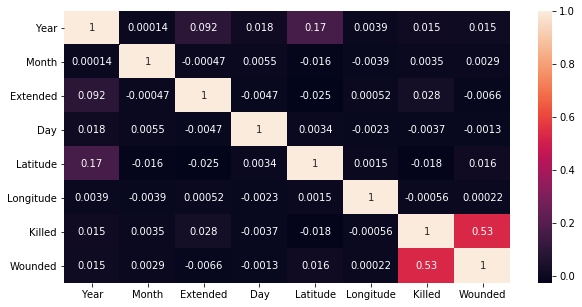

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr() , annot = True)
plt.show()

### Q. Top 10 most affected countries (Terrorist attacks)

In [ ]:
print("Top 10 most affected countries are:\n", df["Country"].value_counts().head(10))

Top 10 most affected countries are:
 Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64


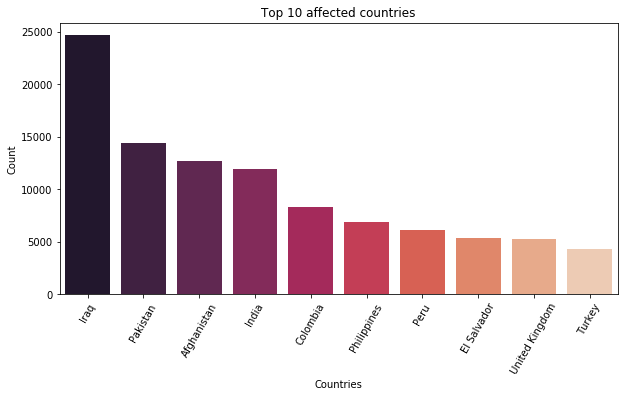

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(df["Country"].value_counts()[:10].index, df["Country"].value_counts()[:10].values, palette="rocket")
plt.title("Top 10 affected countries")
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 60)
plt.show()

#### From the above result we can say that "Iraq" is the most affected country. 

### Q. Top 10 Worst hit States.

In [ ]:
print("Top 10 most hit States are:\n", df["State"].value_counts().head(10))

Top 10 most hit States are:
 Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64


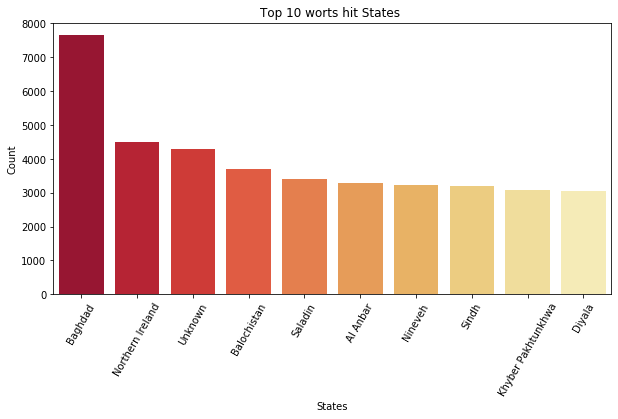

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(df["State"].value_counts()[:10].index , df["State"].value_counts()[:10].values , palette="YlOrRd_r" )
plt.title('Top 10 worts hit States ')
plt.xlabel('States')
plt.ylabel('Count')
plt.xticks(rotation= 60)
plt.show()

#### From the above result we can say that "Baghdad" is the most affected state.

### Q.  Top 10 cities with most attacks.

In [ ]:
print("Top 10 most hit Cities are:\n", df["City"].value_counts().head(10))

Top 10 most hit Cities are:
 Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64


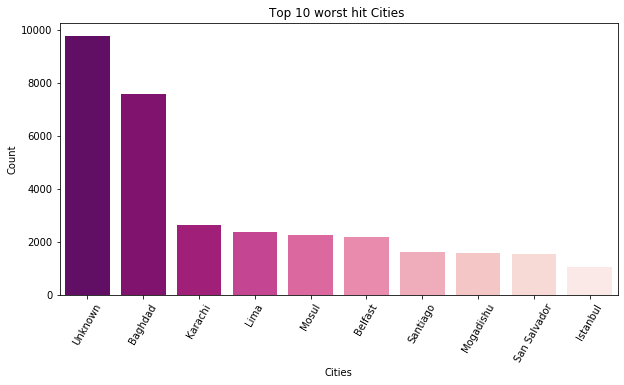

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(df["City"].value_counts()[:10].index , df["City"].value_counts()[:10].values , palette="RdPu_r" )
plt.title('Top 10 worst hit Cities ')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation= 60)
plt.show()

#### From the above result we can say that "Baghdad" is the most affected city.

### Q. Worst hit Region

In [ ]:
print("Top 10 worst hit Regions are:\n", df["Region"].value_counts().head(10))

Top 10 worst hit Regions are:
 Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64


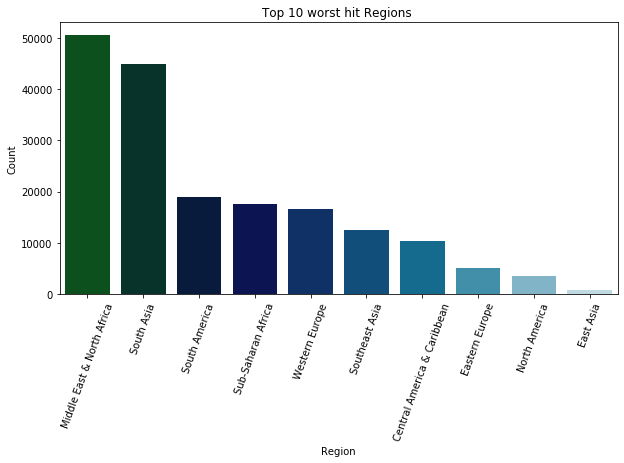

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(df["Region"].value_counts()[:10].index , df["Region"].value_counts()[:10].values , palette="ocean" )
plt.title('Top 10 worst hit Regions ')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation= 70)
plt.show()

#### From the above result we can say that "Middle East & North Africa" is the most affected Region.

### Q. Worst hit year.

In [ ]:
print("Top 10 worst hit years are:\n", df["Year"].value_counts().head(10))

Top 10 worst hit Regions are:
 2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64


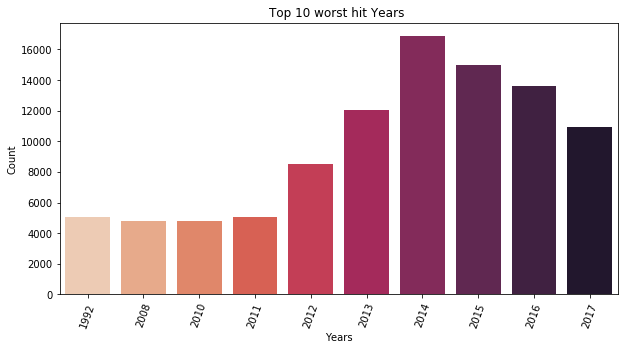

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(df["Year"].value_counts()[:10].index , df["Year"].value_counts()[:10].values , palette="rocket_r" )
plt.title('Top 10 worst hit Years ')
plt.xlabel('Years')
plt.ylabel('Count')
plt.xticks(rotation= 70)
plt.show()

#### From the above result we can say that "2014" is the most affected year.

### Q. Frequent attack types.

In [ ]:
print("Frequent attack types are:\n", df["AttackType"].value_counts().head(10))

Frequent attack types are:
 Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64


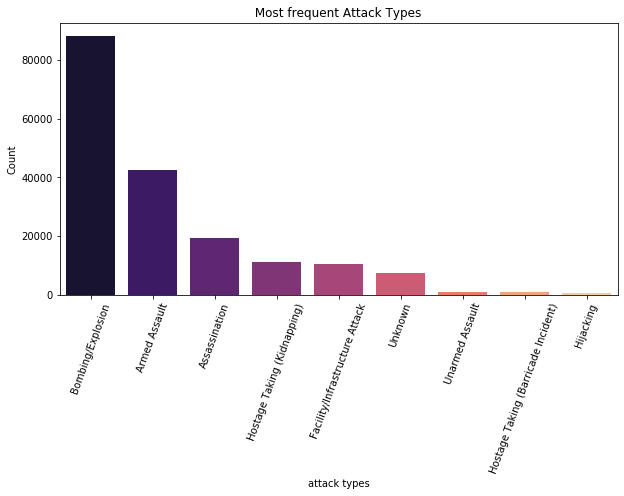

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(df["AttackType"].value_counts()[:10].index , df["AttackType"].value_counts()[:10].values , palette="magma" )
plt.title(' Most frequent Attack Types ')
plt.xlabel('attack types')
plt.ylabel('Count')
plt.xticks(rotation= 70)
plt.show()

#### From the above result we can say that "Bombing/ Explosion" is the most frequent attacking type.

### Q. Top 10 Groups invovled in past terrorist activity.

In [ ]:
print("Group with the most attacks:\n",df['Group'].value_counts().head(10))

Group with the most attacks:
 Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64


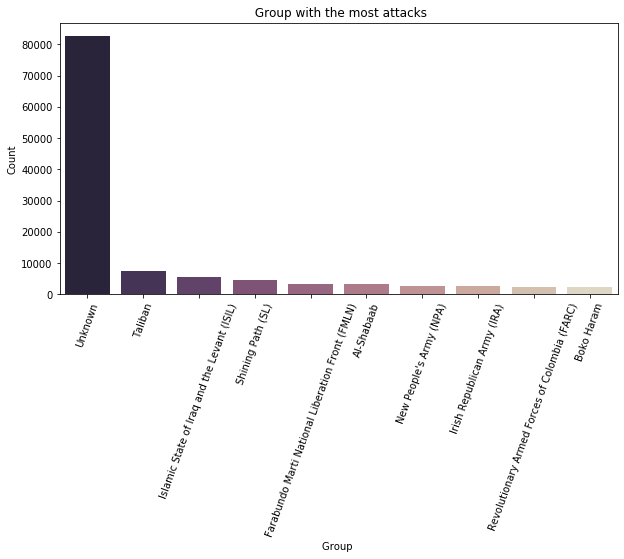

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(df["Group"].value_counts()[:10].index , df["Group"].value_counts()[:10].values , palette="ch:s=-.2,r=.6_r" )
plt.title(' Group with the most attacks')
plt.xlabel('Group ')
plt.ylabel('Count')
plt.xticks(rotation= 70)
plt.show()

#### From the above result we can say that "Taliban" is the most frequent attacking group.

### Q. Most used weapon.

In [ ]:
print("Most used weapons are:\n",df['Weapon_type'].value_counts().head(10))

Most used weapons are:
 Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: Weapon_type, dtype: int64


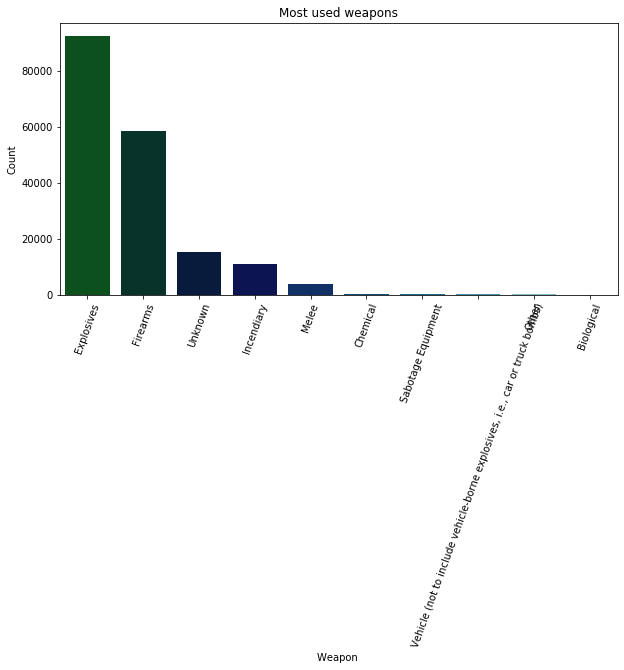

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(df["Weapon_type"].value_counts()[:10].index , df["Weapon_type"].value_counts()[:10].values , palette="ocean" )
plt.title('Most used weapons')
plt.xlabel('Weapon ')
plt.ylabel('Count')
plt.xticks(rotation= 70)
plt.show()

#### From the above result we can say that "Explosives" is the most used weapon.

### Q. Killed VS Wounded

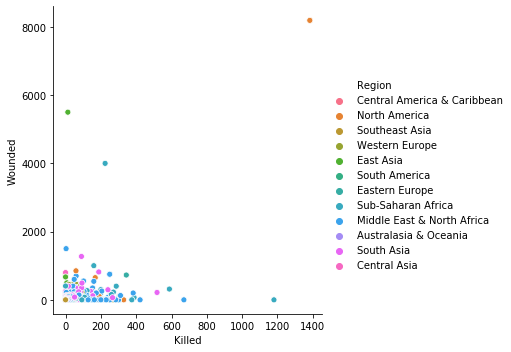

In [ ]:

sns.relplot(x='Killed', y='Wounded', hue='Region',data=df)